In [1]:
from fbprophet import Prophet

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 1000
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [264]:
import math
import numpy as np

In [295]:
import datetime as dt

### 1) Data Processing

In [361]:
sale = pd.read_pickle('sale_no_re.pkl')

In [269]:
#df.loc[df['column_name'] == some_value]

In [270]:
#DTA4E2531JET upward trend
#DTA4E2531IV downward trend
#DTA4E2531GRY

In [362]:
sample = sale.loc[sale['Style_Color'] == 'DTA4E2531GRY']

In [363]:
sample.head()

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,...,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue
23884,DTA4E2531,GRY,wire tassel hook er,AAG001,2018-08-10,12,3.75,$ 45.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,8,DTA4E2531GRY,45.0
23885,DTA4E2531,GRY,wire tassel hook er,ACC012,2018-05-25,12,3.50,$ 42.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,5,DTA4E2531GRY,42.0
23886,DTA4E2531,GRY,wire tassel hook er,ACC019,2017-07-27,12,3.50,$ 42.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2017,7,DTA4E2531GRY,42.0
23887,DTA4E2531,GRY,wire tassel hook er,ACC019,2017-12-15,12,3.50,$ 42.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2017,12,DTA4E2531GRY,42.0
23888,DTA4E2531,GRY,wire tassel hook er,ACC019,2018-01-30,12,3.50,$ 42.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,1,DTA4E2531GRY,42.0


In [364]:
sample_period = pd.DataFrame(sample.groupby(['INVC DATE', 'Style_Color'])['QTY'].sum()).reset_index()

In [365]:
sample_period.describe()

,QTY
count,97.000000
mean,54.505155
std,91.178411
min,12.000000
25%,12.000000
50%,36.000000
75%,60.000000
max,828.000000


In [366]:
sample_period

,INVC DATE,Style_Color,QTY
0,2017-07-10,DTA4E2531GRY,36
1,2017-07-11,DTA4E2531GRY,144
2,2017-07-14,DTA4E2531GRY,60
3,2017-07-25,DTA4E2531GRY,60
4,2017-07-26,DTA4E2531GRY,96
5,2017-07-27,DTA4E2531GRY,12
6,2017-08-03,DTA4E2531GRY,60
7,2017-08-08,DTA4E2531GRY,240
8,2017-08-11,DTA4E2531GRY,12
9,2017-08-15,DTA4E2531GRY,24


In [349]:
#sample_period['INVC DATE'] = pd.to_datetime(sample_period['INVC DATE']).dt.to_period('M')

In [367]:
sample_period

,INVC DATE,Style_Color,QTY
0,2017-07-10,DTA4E2531GRY,36
1,2017-07-11,DTA4E2531GRY,144
2,2017-07-14,DTA4E2531GRY,60
3,2017-07-25,DTA4E2531GRY,60
4,2017-07-26,DTA4E2531GRY,96
5,2017-07-27,DTA4E2531GRY,12
6,2017-08-03,DTA4E2531GRY,60
7,2017-08-08,DTA4E2531GRY,240
8,2017-08-11,DTA4E2531GRY,12
9,2017-08-15,DTA4E2531GRY,24


In [368]:
sample_period = pd.DataFrame(sample_period.groupby(['INVC DATE'])['QTY'].sum())

In [369]:
sample_period = sample_period.reset_index()

In [370]:
sample_period

,INVC DATE,QTY
0,2017-07-10,36
1,2017-07-11,144
2,2017-07-14,60
3,2017-07-25,60
4,2017-07-26,96
5,2017-07-27,12
6,2017-08-03,60
7,2017-08-08,240
8,2017-08-11,12
9,2017-08-15,24


In [371]:
sample_period = sample_period.loc[sample_period['QTY'] <= 120]

In [218]:
#sample_period = sample_period.drop('Style_Color', axis = 1)

### 2) Data Transformation

In [372]:
sample_period = sample_period.rename(columns={'INVC DATE': 'ds'})

In [220]:
#sample_period['QTY'] = sample_period['QTY'].apply(lambda x: int(x))

In [373]:
sample_period.head()

,ds,QTY
0,2017-07-10,36
2,2017-07-14,60
3,2017-07-25,60
4,2017-07-26,96
5,2017-07-27,12


In [374]:
sample_period = sample_period.rename(columns={'QTY':'y'})

In [199]:
#sample_period = sample_period.reset_index()

In [200]:
#sample_period.apply(lambda x: float(x))

In [201]:
#sample_period.set_index('ds')

In [375]:
sample_period.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [376]:
sample_period

,ds,y
0,2017-07-10,36
2,2017-07-14,60
3,2017-07-25,60
4,2017-07-26,96
5,2017-07-27,12
6,2017-08-03,60
8,2017-08-11,12
9,2017-08-15,24
10,2017-08-23,19
11,2017-08-25,12


In [377]:
m = Prophet()
m.fit(sample_period)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Bird_\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [378]:
future = m.make_future_dataframe(periods=365, include_history = True)

In [379]:
future.head()

,ds
0,2017-07-10
1,2017-07-14
2,2017-07-25
3,2017-07-26
4,2017-07-27


#### 3) Forecasting Result

In [380]:
forecast = m.predict(future)
forecast[['ds', 'yhat']]

,ds,yhat
0,2017-07-10,41.421024
1,2017-07-14,44.577250
2,2017-07-25,55.491403
3,2017-07-26,36.043306
4,2017-07-27,48.798105
5,2017-08-03,48.558446
6,2017-08-11,43.618616
7,2017-08-15,54.772428
8,2017-08-23,35.084672
9,2017-08-25,43.139299


In [381]:
forecast['yhat'] = forecast['yhat'].apply(lambda x: np.exp(x))

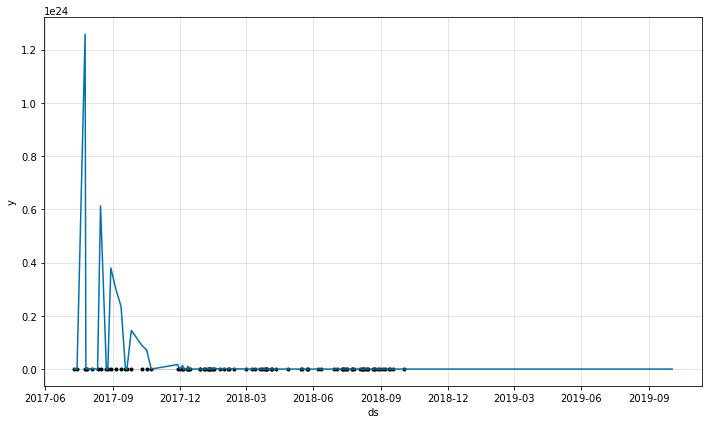

In [382]:
fig1 = m.plot(forecast)

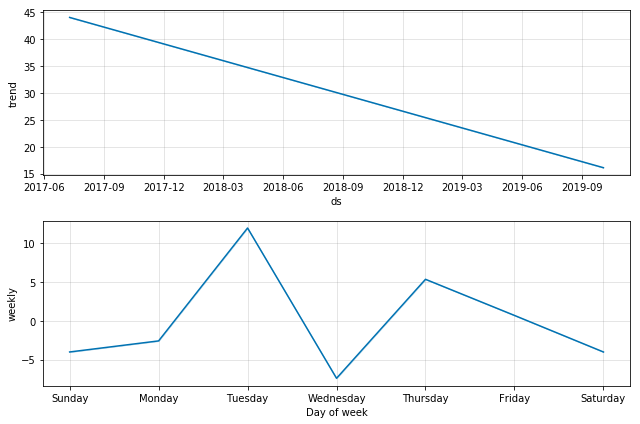

In [383]:
fig2 = m.plot_components(forecast)

In [384]:
metric_df = forecast.set_index('ds')[['yhat']].join(sample_period.set_index('ds').y).reset_index()

In [385]:
metric_df.dropna(inplace=True)

In [386]:
from fbprophet.diagnostics import cross_validation

### 4) Model Evaluation

In [387]:
r2_score(metric_df.y, metric_df.yhat)

-3.0289471592090266e+43

In [388]:
x = mean_squared_error(metric_df.y, metric_df.yhat)
math.sqrt(x)

1.5919842800975514e+23

In [389]:
mean_absolute_error(metric_df.y, metric_df.yhat)

3.49542690441865e+22

For this model / data, the MAE turns out to be 43.58. It tells that for each data point, my average magnitude of error is roughly ~43.58 units off.

### 5) Experiment: Stardardized the Quantity Value

In [107]:
sample_period2 = sample_period.copy()

In [108]:
sample_period2['y'] = sample_period2['y'].apply(lambda x: np.log(x))

In [109]:
sample_period2.head()

,ds,y
0,2017-07-10,3.583519
2,2017-07-14,4.094345
3,2017-07-25,4.094345
4,2017-07-26,4.564348
5,2017-07-27,2.484907


In [110]:
m2 = Prophet()
m2.fit(sample_period2)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Bird_\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [111]:
future2 = m2.make_future_dataframe(periods=365)

In [112]:
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat']].head()

,ds,yhat
0,2017-07-10,3.359380
1,2017-07-14,3.411387
2,2017-07-25,3.758718
3,2017-07-26,3.174599
4,2017-07-27,3.483110


In [113]:
metric_df2 = forecast2.set_index('ds')[['yhat']].join(sample_period2.set_index('ds').y).reset_index()
metric_df2.dropna(inplace=True)

In [114]:
r2_score(metric_df2.y, metric_df2.yhat)

0.0821446908936797

In [115]:
#forecast2['yhat'] = forecast2['yhat'].apply(lambda x: np.exp(x))

In [116]:
forecast2[['ds','yhat']].head()

,ds,yhat
0,2017-07-10,3.359380
1,2017-07-14,3.411387
2,2017-07-25,3.758718
3,2017-07-26,3.174599
4,2017-07-27,3.483110


In [180]:
x = mean_squared_error(metric_df2.y, metric_df2.yhat)
x

0.5153678846496242

In [182]:
math.sqrt(x)

0.717891276343169

In [118]:
mean_absolute_error(metric_df.y, metric_df.yhat)

22.751172267243522

### 6) Increase time series

In [118]:
whole_sale = pd.DataFrame(sale.groupby(['INVC DATE', 'Style_Color'])['QTY'].sum()).reset_index()
whole_sale.head()

,INVC DATE,Style_Color,QTY
0,2016-01-04,DTAB1197BRN,180
1,2016-01-04,DTAB1197JET,180
2,2016-01-04,DTAB1197WHT,180
3,2016-01-04,DTAB1286GD-GRY,12
4,2016-01-04,DTAB1469GD-AQ,12


In [119]:
whole_sale['y'] = 0

In [121]:
whole_sale.loc[whole_sale['Style_Color'] == 'DTA4E2531GRY', 'num'] = whole_sale['QTY']

In [123]:
whole_sale['num'] = whole_sale['num'].fillna(0)

In [127]:
whole_sale

,INVC DATE,Style_Color,QTY,y,num
0,2016-01-04,DTAB1197BRN,180,0,0.0
1,2016-01-04,DTAB1197JET,180,0,0.0
2,2016-01-04,DTAB1197WHT,180,0,0.0
3,2016-01-04,DTAB1286GD-GRY,12,0,0.0
4,2016-01-04,DTAB1469GD-AQ,12,0,0.0
5,2016-01-04,DTAB1469GD-BL,12,0,0.0
6,2016-01-04,DTAB1469GD-PK,12,0,0.0
7,2016-01-04,DTAB1469SV-AQ,12,0,0.0
8,2016-01-04,DTAB1469SV-BL,12,0,0.0
9,2016-01-04,DTAB1469SV-TQ,12,0,0.0


In [129]:
del(whole_sale['Style_Color'])
del(whole_sale['QTY'])
del(whole_sale['y'])

In [133]:
whole_sale = whole_sale.rename(columns={'INVC DATE': 'ds',
                                             'num':'y'})

In [134]:
whole_sale.head()

,ds,y
0,2016-01-04,0.0
1,2016-01-04,0.0
2,2016-01-04,0.0
3,2016-01-04,0.0
4,2016-01-04,0.0


In [135]:
m3 = Prophet()
m3.fit(whole_sale)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Bird_\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [136]:
future3 = m3.make_future_dataframe(periods=365)

In [150]:
forecast3 = m3.predict(future3)
forecast3[['ds', 'yhat']].head()

,ds,yhat
0,2016-01-04,0.000769
1,2016-01-04,0.000769
2,2016-01-04,0.000769
3,2016-01-04,0.000769
4,2016-01-04,0.000769


In [151]:
metric_df3 = forecast3.set_index('ds')[['yhat']].join(whole_sale.set_index('ds').y).reset_index()
metric_df3.dropna(inplace=True)

In [152]:
r2_score(metric_df3.y, metric_df3.yhat)

0.0007517662103939671

In [154]:
mean_squared_error(metric_df3.y, metric_df3.yhat)

10.679804623995667

In [156]:
mean_absolute_error(metric_df3.y, metric_df3.yhat)

0.15683438958312926

#### IT GOT WORSE!